#importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


#Importing the dataset

In [ ]:
df = pd.read_csv("car_data (1).csv")

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


#Data Analysis EDA,DE,DM,DC,DV

In [ ]:
df.shape

(4340, 8)

In [ ]:
print('Fuel Type',df.fuel.unique())
print('Seller Type',df.seller_type.unique())
print('Transmission',df.transmission.unique())
print('owner',df.owner.unique())


Fuel Type ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
Seller Type ['Individual' 'Dealer' 'Trustmark Dealer']
Transmission ['Manual' 'Automatic']
owner ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df['current_year']=2024

In [ ]:
df['no of years']=df['current_year']-df['year']

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no of years
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,2024,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,2024,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,2024,12
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,2024,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2024,10


In [ ]:
df=df.drop(['name','current_year'],axis=1)

In [ ]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,no of years
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,17
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,17
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,12
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,7
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,10


In [ ]:
df_new=pd.get_dummies(df)

In [ ]:
df_new.head()

,year,selling_price,km_driven,no of years,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,17,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False
1,2007,135000,50000,17,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False
2,2012,600000,100000,12,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False
3,2017,250000,46000,7,False,False,False,False,True,False,True,False,False,True,True,False,False,False,False
4,2014,450000,141000,10,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False


In [ ]:
df=df_new.astype(int)

In [ ]:
df.shape

(4340, 19)

In [ ]:
df.head()

,year,selling_price,km_driven,no of years,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,17,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,2007,135000,50000,17,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,2012,600000,100000,12,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,2017,250000,46000,7,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,2014,450000,141000,10,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
df.isnull().sum()

,0
year,0
selling_price,0
km_driven,0
no of years,0
fuel_CNG,0
fuel_Diesel,0
fuel_Electric,0
fuel_LPG,0
fuel_Petrol,0
seller_type_Dealer,0


In [ ]:
df.drop(['fuel_CNG','seller_type_Dealer','transmission_Automatic','owner_Third Owner','owner_Fourth & Above Owner','year'],axis=1,inplace=True)

In [ ]:
df.shape

(4340, 13)

In [ ]:
df.corr()

,selling_price,km_driven,no of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_First Owner,owner_Second Owner,owner_Test Drive Car
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,0.223889,-0.161986,0.048799
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,-0.299731,0.195203,-0.083445
no of years,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,-0.438897,0.292349,-0.095795
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.000878,0.003524,-0.010575
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.020804,0.025960,-0.000952
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,-0.033379,0.030141,-0.004577
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011296,-0.012717,0.012427
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,-0.252628,0.186573,-0.107886
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,0.100430,-0.076764,-0.009729
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,-0.090121,0.068068,0.009152


In [ ]:
#sns.pairplot(df)

<Axes: >

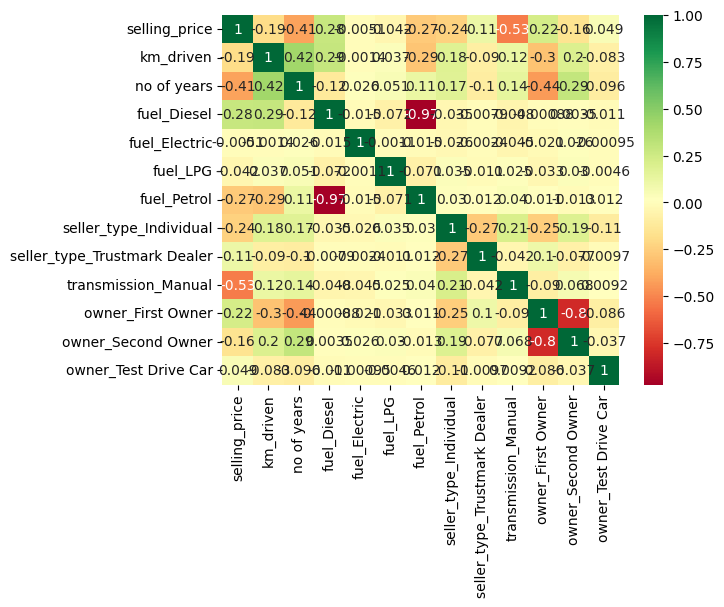

In [ ]:
figsize=(10,100)
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [ ]:
x=df.iloc[:,2:]
y=df.iloc[:,1]

In [ ]:
x

,no of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_First Owner,owner_Second Owner,owner_Test Drive Car
0,17,0,0,0,1,1,0,1,1,0,0
1,17,0,0,0,1,1,0,1,1,0,0
2,12,1,0,0,0,1,0,1,1,0,0
3,7,0,0,0,1,1,0,1,1,0,0
4,10,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4335,10,1,0,0,0,1,0,1,0,1,0
4336,10,1,0,0,0,1,0,1,0,1,0
4337,15,0,0,0,1,1,0,1,0,1,0
4338,8,1,0,0,0,1,0,1,1,0,0


In [ ]:
y

,km_driven
0,70000
1,50000
2,100000
3,46000
4,141000
...,...
4335,80000
4336,80000
4337,83000
4338,90000


In [ ]:
df.head()

,selling_price,km_driven,no of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_First Owner,owner_Second Owner,owner_Test Drive Car
0,60000,70000,17,0,0,0,1,1,0,1,1,0,0
1,135000,50000,17,0,0,0,1,1,0,1,1,0,0
2,600000,100000,12,1,0,0,0,1,0,1,1,0,0
3,250000,46000,7,0,0,0,1,1,0,1,1,0,0
4,450000,141000,10,1,0,0,0,1,0,1,0,1,0


#Feature selection (feature importance)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model = ExtraTreesRegressor()
feat_imp=model.fit(x,y)

In [ ]:
dff=feat_imp.feature_importances_

In [ ]:
dff.ndim # to check the dimesions

1

<Axes: >

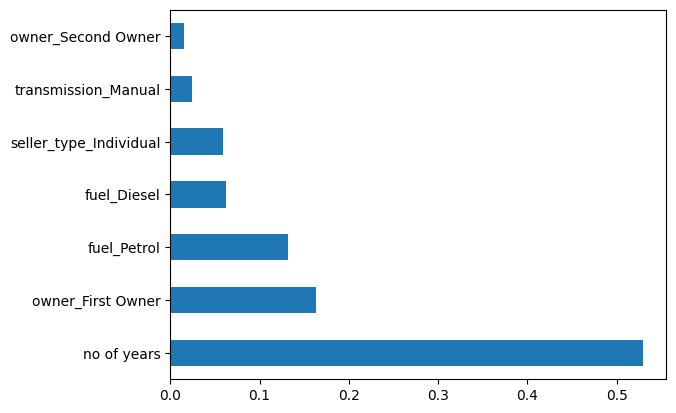

In [ ]:
imp=pd.Series(feat_imp.feature_importances_,index=x.columns)
imp.nlargest(7).plot(kind='barh')


#Splitting the data

In [ ]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train

,no of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_First Owner,owner_Second Owner,owner_Test Drive Car
159,9,1,0,0,0,1,0,1,1,0,0
4334,12,1,0,0,0,1,0,1,1,0,0
1657,18,0,0,0,1,1,0,1,1,0,0
2188,9,0,0,0,1,0,1,1,1,0,0
581,8,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1033,11,1,0,0,0,0,0,0,1,0,0
3264,12,1,0,0,0,1,0,1,1,0,0
1653,8,0,0,0,1,1,0,1,1,0,0
2607,9,1,0,0,0,1,0,1,1,0,0


In [ ]:
y_train

,no of years,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_First Owner,owner_Second Owner,owner_Test Drive Car
2089,12,1,0,0,0,0,0,0,1,0,0
1077,11,1,0,0,0,0,0,0,1,0,0
1495,10,0,0,0,1,1,0,1,0,0,0
555,5,1,0,0,0,0,0,0,1,0,0
2615,15,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1359,16,0,0,0,1,0,0,1,1,0,0
4197,14,1,0,0,0,1,0,1,0,0,0
1818,11,0,0,0,1,1,0,1,0,0,0
2644,19,0,0,0,1,1,0,1,0,0,0


#Model selection

In [ ]:
regressor=RandomForestRegressor()

#Hyperparameter Tuning

In [ ]:
import numpy as np
n_estimators=[int(i) for i in np.linspace(start =100,stop=1200,num=12)] # Use int(i) to convert each element 'i' to an integer
max_features=['auto','sqrt']
max_depth=[int(i) for i in np.linspace(start =5,stop=30,num=6)] # Use int(i) to convert each element 'i' to an integer. Also, correct the typo in np.linspace
min_samples_leaf=[1,2,5,10,15,100]
min_samples_split=[1,2,5,10,15,100]

In [ ]:
random_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_leaf':min_samples_leaf,
           'min_samples_split':min_samples_split}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 10, 15, 100], 'min_samples_split': [1, 2, 5, 10, 15, 100]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_regressor=RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_square_error',cv=5,verbose =2,random_state=42,n_jobs=1)

In [ ]:
rf_regressor=RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error',cv=5,verbose =2,random_state=42,n_jobs=1)

In [ ]:
rf_regressor=rf_regressor.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=900; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=900; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=900; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=900; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=100, min_samples_split=100, n_estimators=900; total time=   1.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=15, min_samples_split=5

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

In [ ]:
rf_regressor.best_params_ #perfect parameter values

{'n_estimators': 900,
 'min_samples_split': 100,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

#Predict the model

In [ ]:
y_pred=rf_regressor.predict(x_test)

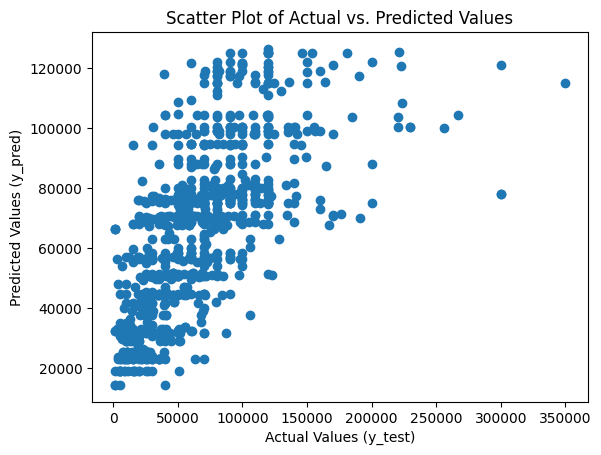

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.show()

In [ ]:
finaldf=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
finaldf

,Actual,Predicted
3978,80000,103479.269436
1448,27000,18860.162034
2664,41723,76036.116333
17,141000,100308.946151
1634,60000,68717.404753
...,...,...
3468,60000,82655.006262
3164,120000,74969.361701
416,40000,104444.380671
1616,6480,29608.977326


<Axes: >

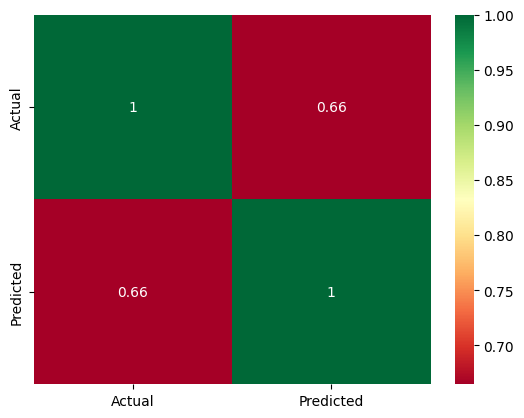

In [ ]:
sns.heatmap(finaldf.corr(),annot=True,cmap='RdYlGn')

#Perfomance / Accuracy

In [ ]:
r2_score(y_test,y_pred)

0.4378739760043343

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,y_pred)

1167600394.5514278

In [ ]:
#43 percent accuracy